PART 1: IDK MAN

A)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set()
import math

B)

In [4]:
data_raw = pd.read_csv("data.csv")

C:\Users\achyu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_raw.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


PART 2:
EDA

A)

In [6]:
extracted = data_raw[data_raw['PlayId']==20181115001638]#Extract all the rows with correct play ID
print(len(extracted))#Should be 22
extracted.head()

22


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
404426,2018111500,20181115001638,away,88.30,30.41,3.76,3.01,0.39,265.47,233.93,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404427,2018111500,20181115001638,away,90.99,26.82,3.63,0.96,0.35,315.67,339.90,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404428,2018111500,20181115001638,away,93.24,28.22,5.06,0.79,0.50,175.16,118.46,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404429,2018111500,20181115001638,away,89.15,28.82,2.15,1.57,0.19,197.42,207.64,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South
404430,2018111500,20181115001638,away,90.09,24.84,0.83,0.83,0.07,247.78,192.83,...,11,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Partly Cloudy,54.0,69.0,6,South


For this, we can clearly see that StadiumType, Turf, and GameWeather are constant across games. This makes sense, cause these are global factors. The stadium doesn't care about who's in it. For the Players, X, Y, and Orientation vary from player to player.

B)

Code that we need to copy for the assignment

In [7]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12*2, 6.33*2)):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

def plot_play(play_id, train_df=data_raw):
    def get_dx_dy(angle, dist):
        cartesianAngleRadians = (450-angle)*math.pi/180.0
        dx = dist * math.cos(cartesianAngleRadians)
        dy = dist * math.sin(cartesianAngleRadians)
        return dx, dy

    fig, ax = create_football_field()
    train_df.query("PlayId == @play_id and Team == 'away'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=50, legend='Away')
    train_df.query("PlayId == @play_id and Team == 'home'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=50, legend='Home')
    train_df.query("PlayId == @play_id and NflIdRusher == NflId") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='red', s=100, legend='Rusher')
    rusher_row = train_df.query("PlayId == @play_id and NflIdRusher == NflId")
    yards_covered = rusher_row["Yards"].values[0]

    x = rusher_row["X"].values[0]
    y = rusher_row["Y"].values[0]
    rusher_dir = rusher_row["Dir"].values[0]
    rusher_orientation = rusher_row["Orientation"].values[0]
    rusher_speed = rusher_row["S"].values[0]
    dx, dy = get_dx_dy(rusher_dir, rusher_speed)
    dx_o, dy_o = get_dx_dy(rusher_orientation, rusher_speed/2)

    ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.3)
    ax.arrow(x, y, dx_o, dy_o, length_includes_head=True, width=0.3, color="yellow")
    plt.title(f'Play # {play_id} and yard gain is {yards_covered}', fontsize=20)
    plt.show()

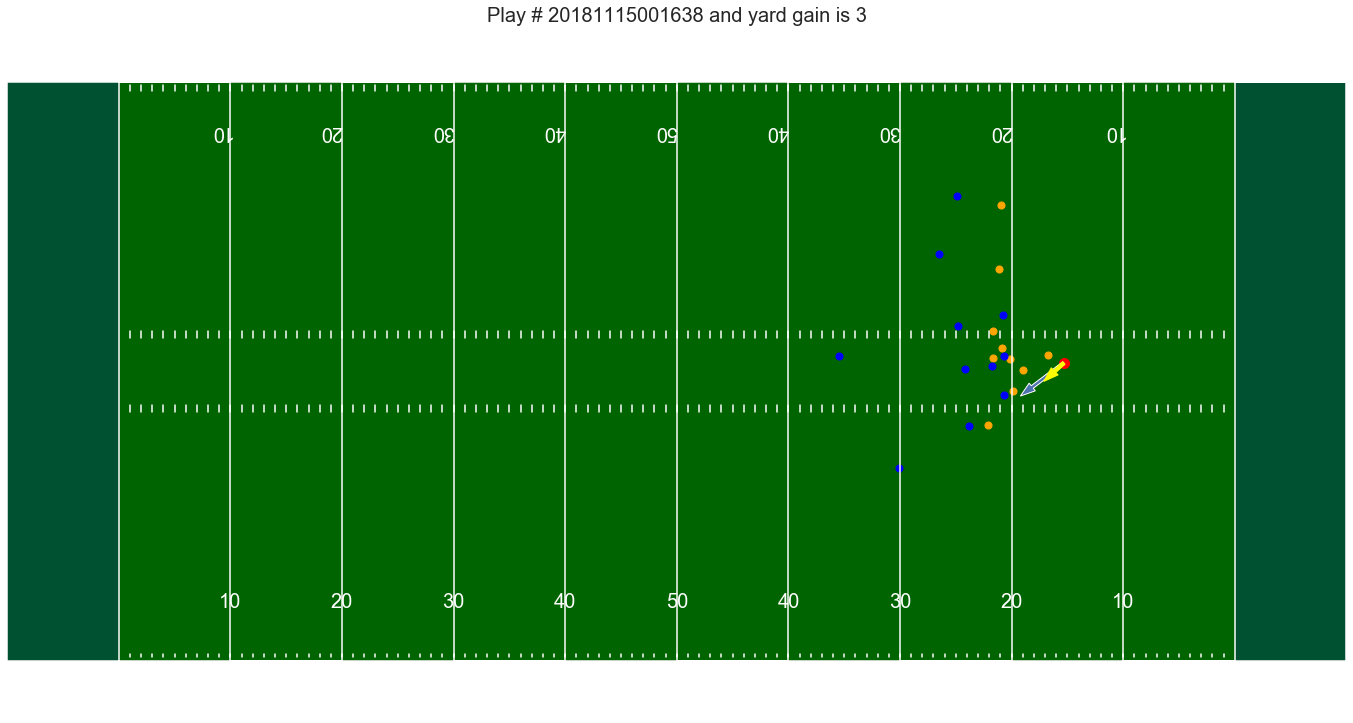

In [8]:
# how to use these two functions (one calls the other)
plot_play(play_id=20181115001638, train_df=data_raw)

C)

The offensive team is rushing to the left, and is looking approximately where he is running. The defensive and offensive team are clustered around the line of the rush

In [9]:
data_raw[data_raw['Season']==2018]# let's find some 2018 plays to look at, shall we?

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
261800,2018090600,20180906000104,away,86.00,32.76,3.19,2.58,0.33,85.61,28.91,...,1,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,81.0,71.0,8,NNW
261801,2018090600,20180906000104,away,78.70,30.60,2.77,2.46,0.29,302.19,334.36,...,1,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,81.0,71.0,8,NNW
261802,2018090600,20180906000104,away,77.54,32.73,1.37,3.36,0.12,358.44,349.46,...,1,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,81.0,71.0,8,NNW
261803,2018090600,20180906000104,away,82.34,34.64,2.07,2.57,0.15,319.69,30.71,...,1,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,81.0,71.0,8,NNW
261804,2018090600,20180906000104,away,86.89,32.85,7.24,3.56,0.72,176.40,156.60,...,1,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,81.0,71.0,8,NNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509757,2018123015,20181230154157,home,86.77,24.20,2.14,2.12,0.22,44.55,15.31,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509758,2018123015,20181230154157,home,86.76,27.18,1.16,0.66,0.11,53.63,42.80,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509759,2018123015,20181230154157,home,87.26,27.05,2.59,1.18,0.26,3.96,21.12,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509760,2018123015,20181230154157,home,84.57,24.37,4.36,1.79,0.47,148.08,183.34,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE


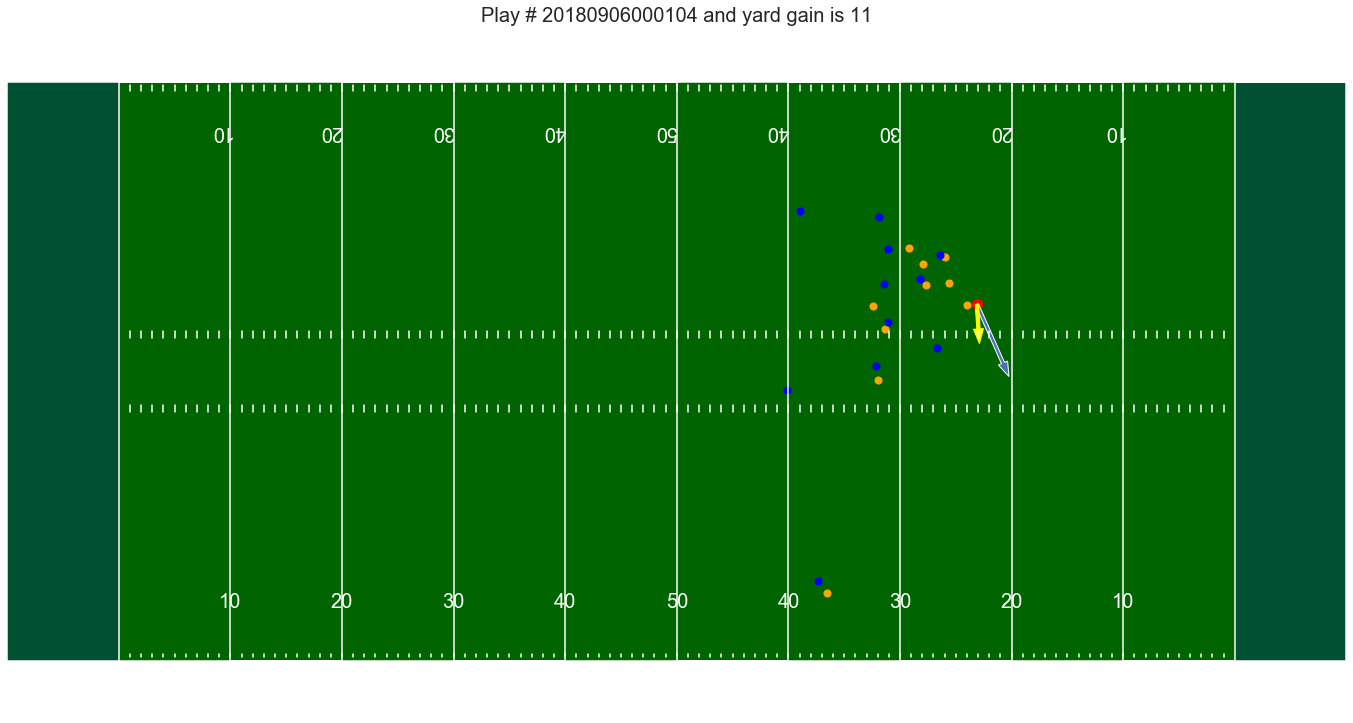

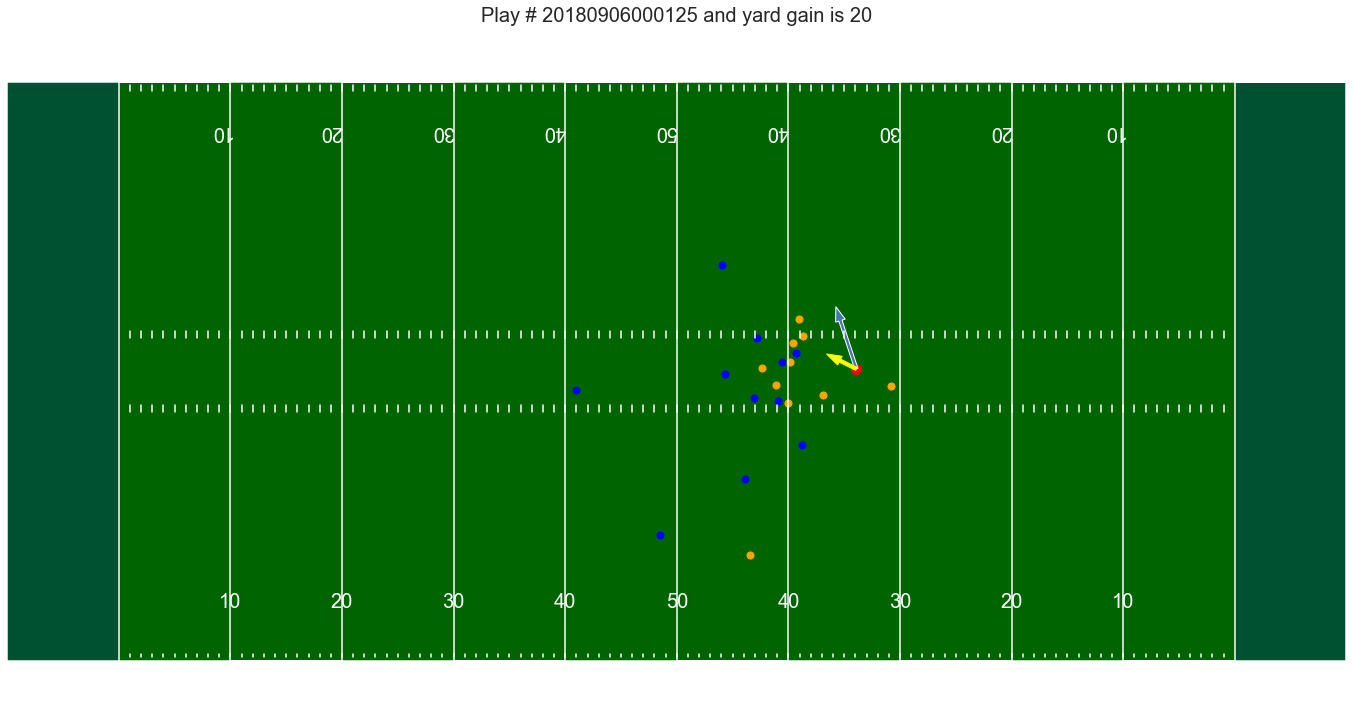

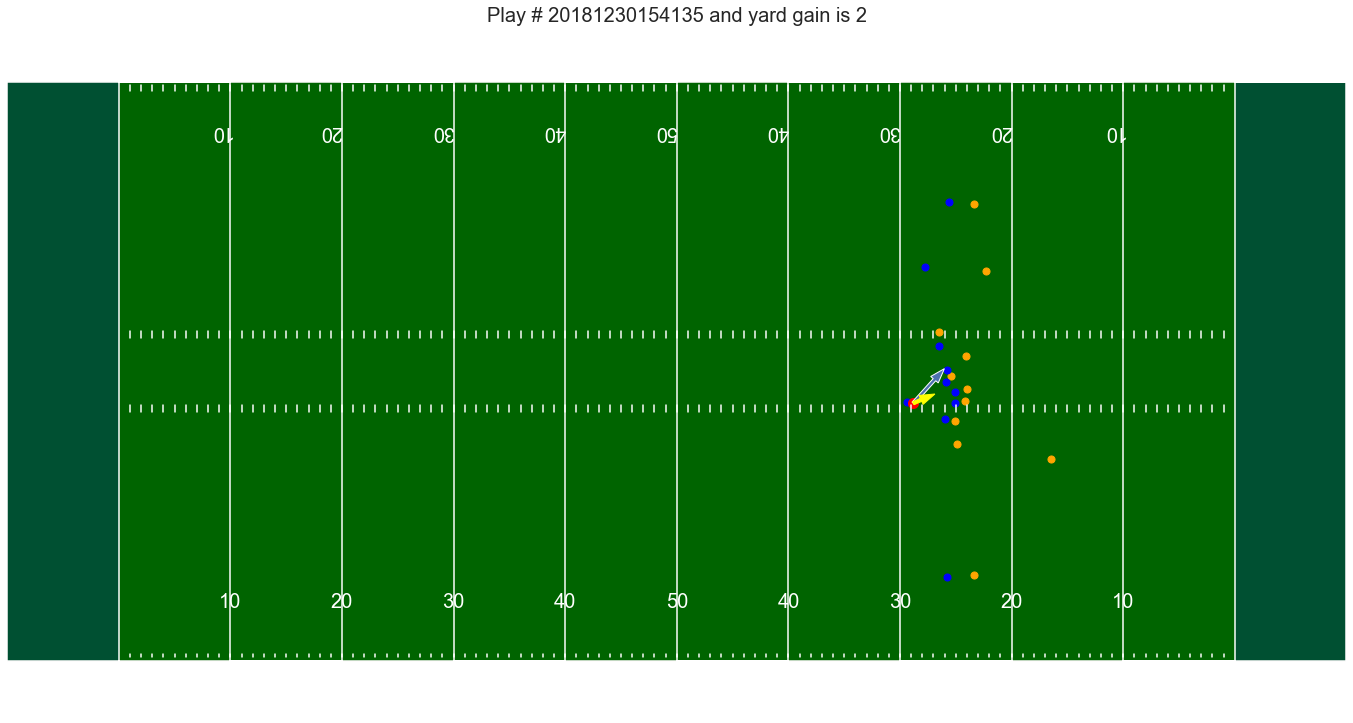

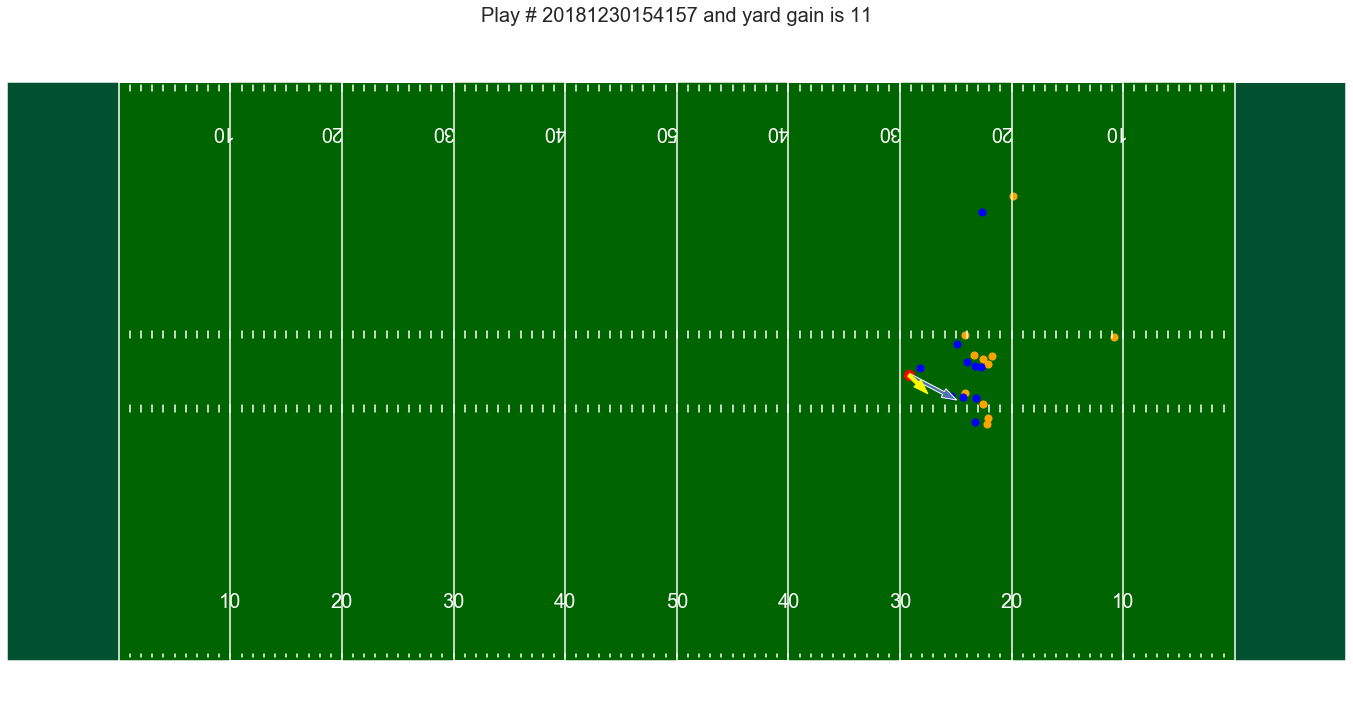

In [10]:
plot_play(play_id=20180906000104, train_df=data_raw)
plot_play(play_id=20180906000125, train_df=data_raw)
plot_play(play_id=20181230154135, train_df=data_raw)
plot_play(play_id=20181230154157, train_df=data_raw)
#Should be enough plays to check against the 2017 ones


In [11]:
data_raw[data_raw['Season']==2017]# let's find some 2017 plays to look at, shall we?

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261795,2017123115,20171231154291,home,79.21,28.51,1.84,0.71,0.21,312.81,5.00,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Sunny,40.0,78.0,7,N
261796,2017123115,20171231154291,home,81.39,42.25,4.45,3.08,0.46,21.52,102.50,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Sunny,40.0,78.0,7,N
261797,2017123115,20171231154291,home,75.75,25.69,3.75,1.62,0.45,335.48,42.59,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Sunny,40.0,78.0,7,N
261798,2017123115,20171231154291,home,80.18,24.17,0.93,1.42,0.09,359.65,78.51,...,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Sunny,40.0,78.0,7,N


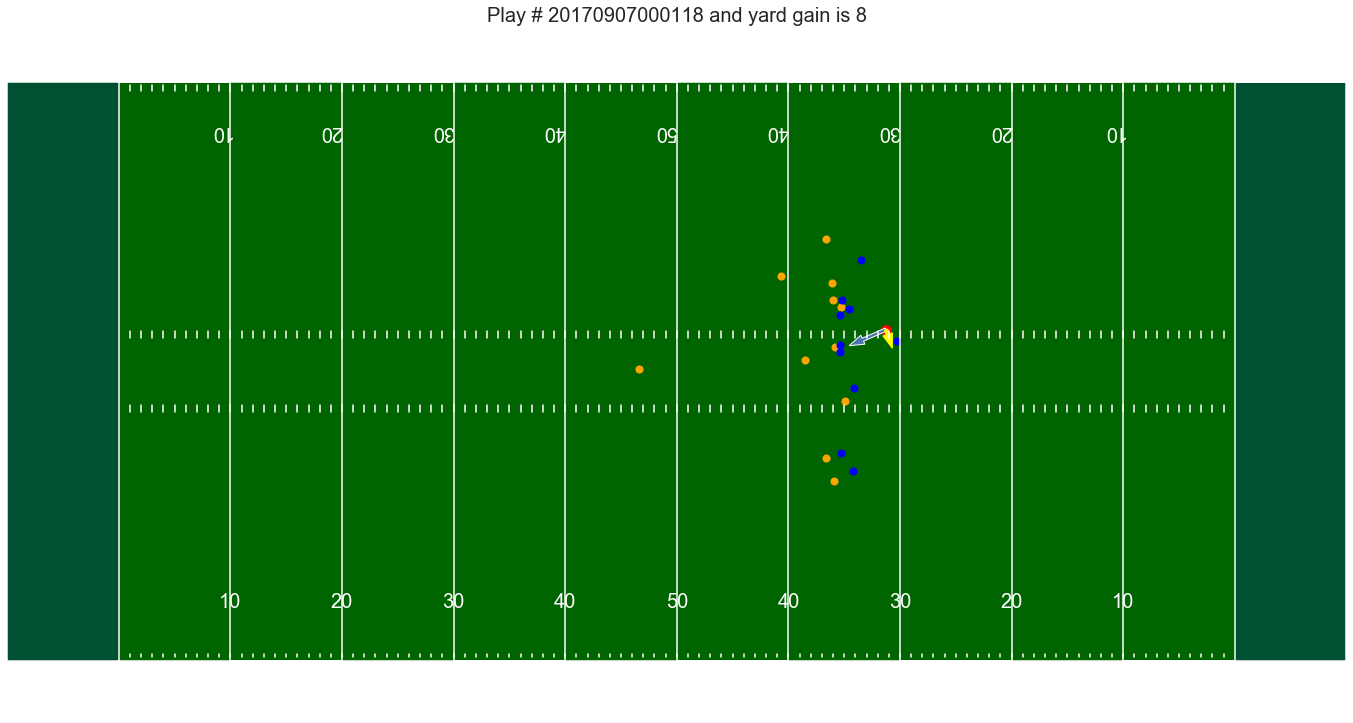

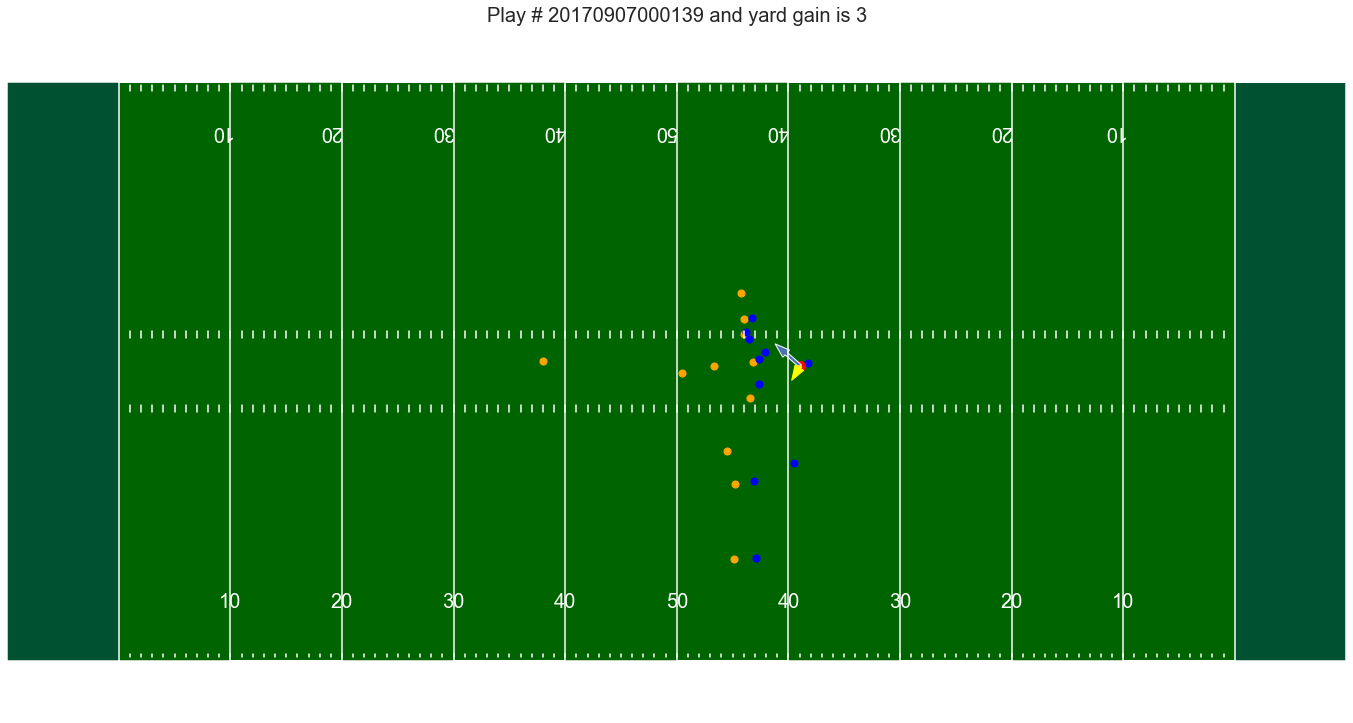

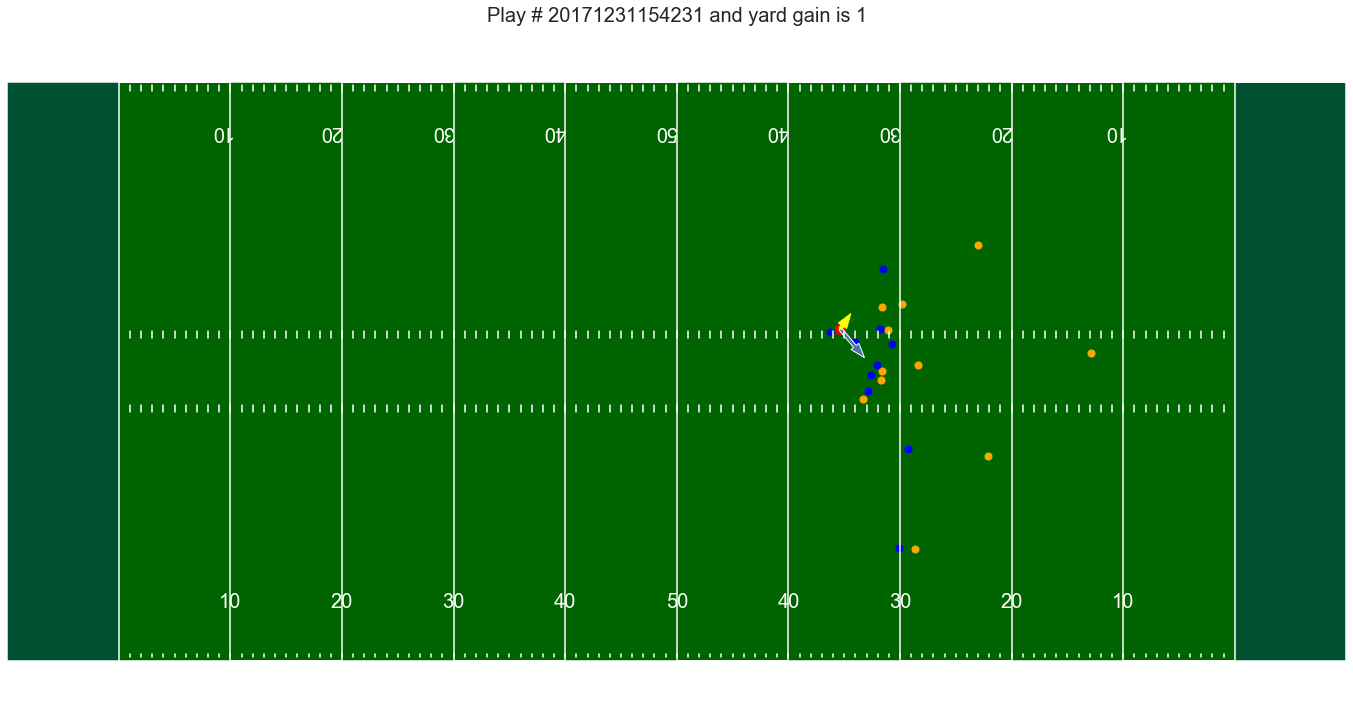

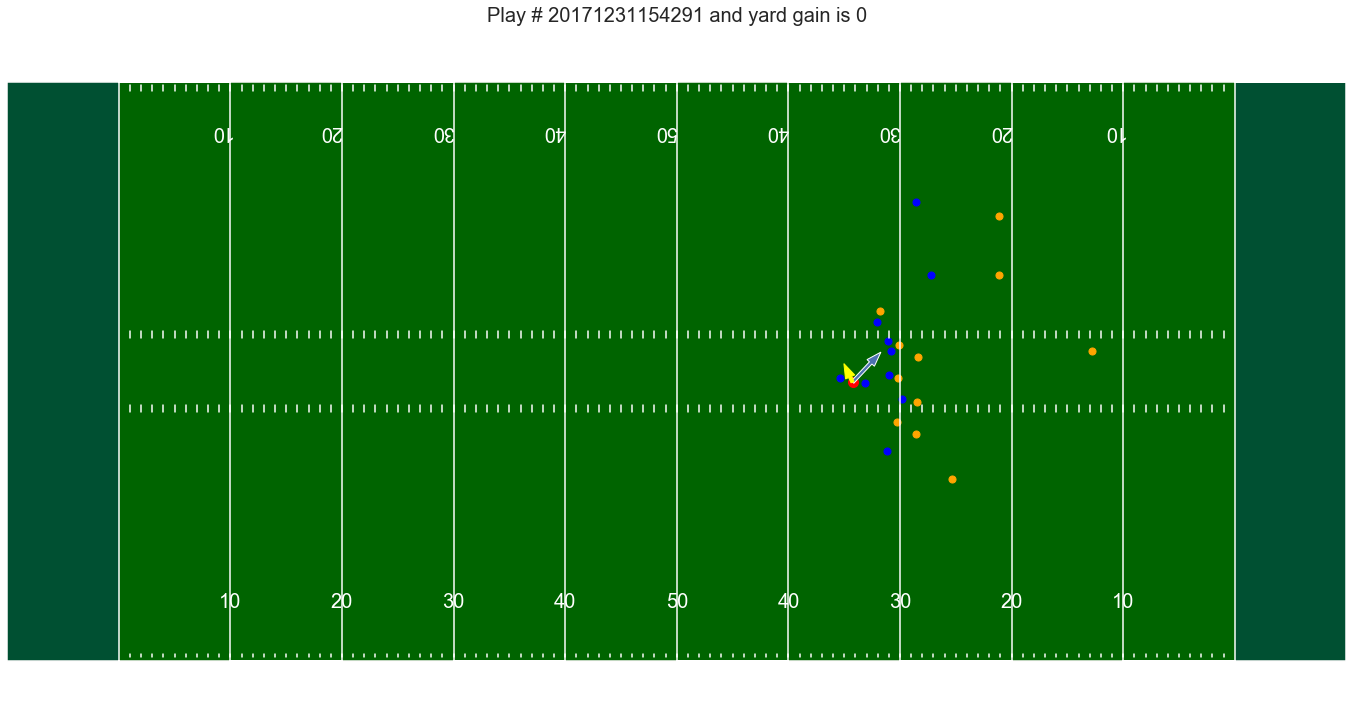

In [12]:
plot_play(play_id=20170907000118, train_df=data_raw)
plot_play(play_id=20170907000139, train_df=data_raw)
plot_play(play_id=20171231154231, train_df=data_raw)
plot_play(play_id=20171231154291, train_df=data_raw)

We can clearly see that in the 2017 samples, the player orientation is in a nonsensical direction, 90 degress off of their running direction, and in the 2018 samples, the player orientation is reasonable. We need to correct for this later, so the footbal players don't break their necks.

D)

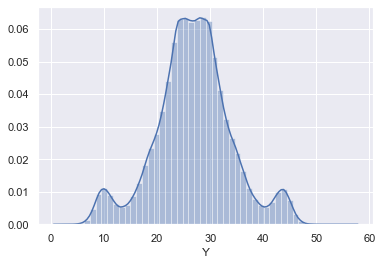

In [13]:
sns.distplot(data_raw['Y'])#Plot of distribution of Y values

It is a roughly symmetric bimodal distribution centered around 27. This makes sense, because of the fact  that most rush plays will be "down the center". We see small spikes on either sides, which most likely some sort of "flank" style play.

E)

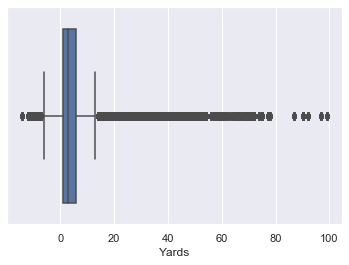

In [14]:
sns.boxplot(data_raw['Yards'])#Boxplot of Yards gained

This boxplot does not give us much valueable information, other than that the data is skewed right.

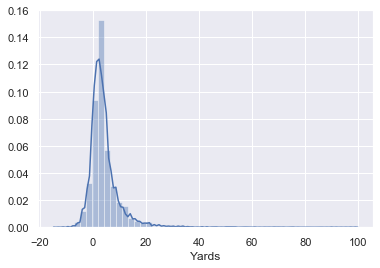

In [15]:
sns.distplot(data_raw['Yards'])

Again, very very skewed right. We also see the large peak around 4 yards gained. We also see the trend that runs are kinda garbage for getting tons of yards, as they tend to only get a handful.

In [16]:
data_raw['Yards'].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

We see from this that half the data points have between 1 and 6 yards gained. There's 1 absolute madlad who ran 99 yards, which is the maximum. The minimum value is the play that lost 14 yards in 1 run. The median value of 3, is significantly smaller than the mean of 4.21. This is expected or a right-skewed distribution. All in all, runs seem consistent to get just a few yards, which is expected given my limited knowledge of football. Note the high standard deviation, however, which might point to it being hard to predict exact values.

F)

In [17]:
data_raw['StadiumType'].describe()#Frequencies

count      476828
unique         29
top       Outdoor
freq       267696
Name: StadiumType, dtype: object

In [18]:
data_raw['StadiumType']

0         Outdoor
1         Outdoor
2         Outdoor
3         Outdoor
4         Outdoor
           ...   
509757    Outdoor
509758    Outdoor
509759    Outdoor
509760    Outdoor
509761    Outdoor
Name: StadiumType, Length: 509762, dtype: object

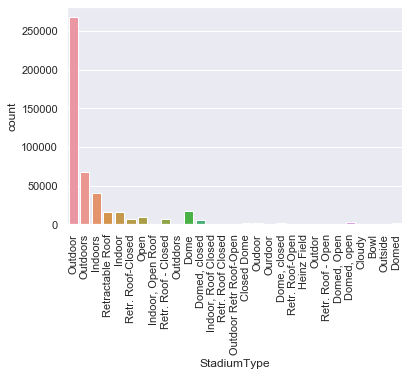

In [22]:
plot1=sns.countplot(data_raw['StadiumType'])
plot1.set_xticklabels(plot.get_xticklabels(), rotation=90)#rotate text so it's actually readable lol
plot1

We can clearly see from these plots and summaries that Outdoor Stadiums are by far the most common. The spelling is indeed poor.(HEINZ!)Note the messy spelling the the data, with Outdoors, Outdoor, Outddors, all probably representing the same column. Also note the "Stadium Type" by name of "Heinz", which refers to 1 specific stadium.

G)

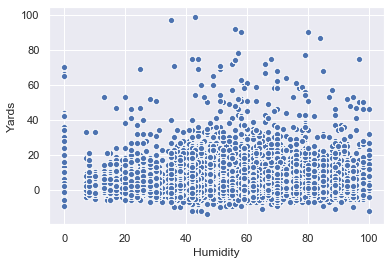

In [20]:
sns.scatterplot(x=data_raw['Humidity'],y=data_raw['Yards']) #scatterplot of Yards vs Humidity

We see here, that the scatterplot seems practically random, and therefore no strong correlation seems to exist. Humidity does not impact yards gained meaningfully.

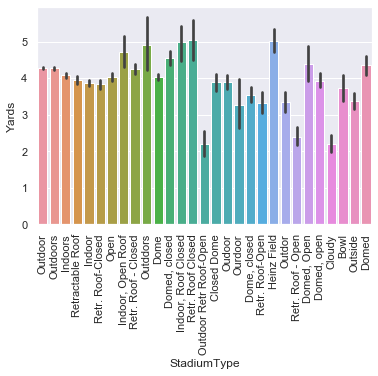

In [21]:
plot = sns.barplot(x=data_raw['StadiumType'],y=data_raw['Yards'])#Barplot of central tendencies. Yes, it's messy (ahem sus columns), but it still makes the point stand.
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)#rotate text so it's actually readable lol
plot

It seems like that there might be some relationship present between stadium type and yards gained, but the data doesn't point to anything too major. This variation is most likely explained by the large differences in sample sizes across different stadium types. As we see in the instructions, it doesn't matter too much. 

PART 3)

In [33]:
def clean_data(data):
    data = data.copy() # DataFrames are objects, we don't to mess with what we passed in
    # a)
    print("Part A Started")
    data.drop(columns=["Stadium", "Location", "StadiumType", "Turf", "GameWeather", "Temperature", "Humidity", "WindDirection", "WindSpeed", "Week"], inplace=True)
    # b)
    print("Part B Started")
    #find the anomalies, we don't need to run this every time we clean the data, but it's nice to keep this for the memories
    '''
    validAbbreviations=set(['ARZ','ARI','ATL','BLT','BAL','BUF','CAR','CHI','CIN','CLV','CLE','DAL','DEN','DET','GB','HST','HOU','IND','JAX','KC','LV','LAC','LAR','MIA','MIN','NE','NO','NYG','NYJ','PHI','PIT','SF','SEA','TB','TEN','WAS','LA','OAK'])
    index =0
    for value in data['PossessionTeam']:
        if value not in validAbbreviations:
            print("Misspelling in PossessionTeam column on row "+str(index)+". The anomalous value is" +str(value))
        index+=1
    index=0
    for value in data['HomeTeamAbbr']:
        if value not in validAbbreviations:
            print("Misspelling in HomeTeamAbbr column on row "+str(index)+". The anomalous value is" +str(value))
        index+=1
    index =0
    for value in data['VisitorTeamAbbr']:
        if value not in validAbbreviations:
            print("Misspelling in VisitorTeamAbbr column on row "+str(index)+". The anomalous value is" +str(value))
        index+=1
    '''
    #Issue! common names used instead of official ones! Now let's find and replace ARI with ARZ, HOU with HST, and BAL with BLT to improve consistency
    data.replace(to_replace="BAL",value='BLT')
    data.replace(to_replace="ARI",value='ARZ')
    data.replace(to_replace="HOU",value='HST')
    # c)
    print("Part C Started")
    data['IsRusher']=np.multiply((data['NflId']==data['NflIdRusher']), 1)#converts boolean to int
    #this works fine
    # d)
    print("Part D Started")
    data["OffensiveScore"]=data["VisitorScoreBeforePlay"]
    data["DefensiveScore"]=data["VisitorScoreBeforePlay"]
    data.loc[data.PossessionTeam==data.HomeTeamAbbr, 'OffensiveScore']=data["HomeScoreBeforePlay"]
    data.loc[data.PossessionTeam!=data.HomeTeamAbbr, 'DefensiveScore']=data["HomeScoreBeforePlay"]
    
    # e) Paste the copied code! Make sure to fix the * signs that got yeeted
    print("Part E Started")
    data["ToLeft"] = data.PlayDirection == "left"
    data["Dir_rad"] = np.mod(90 - data.Dir, 360) *math.pi/180.0
    data["Orientation_rad"] = np.mod(90 - data.Orientation, 360) *math.pi/180.0
    data["TeamOnOffense"] = "home"
    data.loc[data.PossessionTeam != data.HomeTeamAbbr, "TeamOnOffense"] = "away"
    data["IsOnOffense"] = data.Team == data.TeamOnOffense
    data["YardLine_std"] = 100 - data.YardLine
    data.loc[data.FieldPosition.fillna("") == data.PossessionTeam, "YardLine_std"] = data.loc[data.FieldPosition.fillna("") == data.PossessionTeam, "YardLine"]
    data["YardLine"] = data.YardLine_std
    data["X_std"] = data.X
    data.loc[data.ToLeft, "X_std"] = 120 - data.loc[data.ToLeft, "X"]
    data["X"] = data.X_std - data.YardLine - 10
    data["Y_std"] = data.Y
    data.loc[data.ToLeft, "Y_std"] = 160/3 - data.loc[data.ToLeft, "Y"]
    data["Y"] = data.Y_std
    data["Dir_std"] = data.Dir_rad
    data["Orientation_std"] = data.Orientation_rad
    data.loc[data.ToLeft, "Dir_std"] = np.mod(np.pi + data.loc[data.ToLeft, "Dir_rad"], 2*np.pi)
    data.loc[data.ToLeft, "Orientation_std"] = np.mod(np.pi + data.loc[data.ToLeft, "Orientation_rad"], 2*np.pi)
    data["Dir"] = data.Dir_std
    data["Orientation"] = data.Orientation_std
    
    # f) Do some math here, basically spends a while computing what direction to turn using the sign function, along with clever use of absolute value and minimum, combined into a helper function (absmin), and turns the vector 90 degrees in that way. Took me soooo long
    print("Part F Started")
    data.loc[data.Season==2017, 'Orientation'] = np.mod(data.loc[data.Season==2017, 'Orientation'] - 0.5*np.pi*np.sign(absmin(data.loc[data.Season==2017, 'Orientation']-data.loc[data.Season==2017, 'Dir'],data.loc[data.Season==2017, 'Dir']-data.loc[data.Season==2017, 'Orientation'])), 2*np.pi)
    
    # g)
    print("Part G Started")
    n = data["Dir"].mean()
    data[['Dir']] = data[['Dir']].fillna(value=n)
    n = data["DefendersInTheBox"].mean()
    data[['DefendersInTheBox']] = data[['DefendersInTheBox']].fillna(value=n)
    data[['OffenseFormation']] = data[['OffenseFormation']].fillna(value="unkown")
    data[['Orientation']] = data[['Orientation']].fillna(value=data['Dir'])
    #Fill Fill FILLLLLLLLLLL
    
    # h) 
    print("Part H Started")
    #oh boy do I love copying code when Felix Zou tells me to <3.
    data["PlayerId"] = data["JerseyNumber"].astype(str) + "" + data["NflId"].astype(str)
    data["UniquePlayId"] = data["GameId"].astype(str) + "" + data["PlayId"].astype(str)
    
    # i)
    print("Part I Started")
    data=data[["GameId", "PlayId", "X", "Y", "S", "A", "Dis", "Orientation", "Dir", "Season", "YardLine", "Quarter", "GameClock", "Down", "Distance", "OffenseFormation", "OffensePersonnel", "DefendersInTheBox", "DefensePersonnel", "TimeHandoff", "TimeSnap", "Yards", "PlayerHeight", "PlayerWeight", "PlayerCollegeName", "Position", "IsRusher", "OffensiveScore", "DefensiveScore", "IsOnOffense", "PlayerId", "UniquePlayId"]]
    
    # j)
    print("Part J Started")
    data['PlayerValue']= 1*data['IsOnOffense']+1*data["IsRusher"]
    data.sort_values(by=['PlayId','PlayerValue','PlayerId'], inplace=True)
    data.reindex(range(0,len(data)))
    data['Meow']=np.mod(data.index,22)
    for i in range(22):
        data.loc[data.Meow==21,(str(i)+'_Position')]= data.loc[data.Meow==i, 'Position']
        data.loc[data.Meow==21,(str(i)+'_X')]= data.loc[data.Meow==i, 'X']
        data.loc[data.Meow==21,(str(i)+'_Y')]= data.loc[data.Meow==i, 'Y']
        data.loc[data.Meow==21,(str(i)+'_S')]= data.loc[data.Meow==i, 'S']
        data.loc[data.Meow==21,(str(i)+'_A')]= data.loc[data.Meow==i, 'A']
        data.loc[data.Meow==21,(str(i)+'_Dir')]= data.loc[data.Meow==i, 'Dir']
        data.loc[data.Meow==21,(str(i)+'_Dis')]= data.loc[data.Meow==i, 'Dis']
        data.loc[data.Meow==21,(str(i)+'_Orientation')]= data.loc[data.Meow==i, 'Orientation']
        data.loc[data.Meow==21,(str(i)+'_PlayerCollegeName')]= data.loc[data.Meow==i, 'PlayerCollegeName']
        data.loc[data.Meow==21,(str(i)+'_PlayerHeight')]= data.loc[data.Meow==i, 'PlayerHeight']
        data.loc[data.Meow==21,(str(i)+'_PlayerWeight')]= data.loc[data.Meow==i, 'PlayerWeight']
    data=data[data['Meow']==21]
    data.drop(['X','Y','S','A','Dis','Orientation','Dir','PlayerCollegeName', 'PlayerHeight','PlayerWeight','Meow','PlayerValue','Position','PlayerId', 'IsOnOffense','IsRusher'],axis=1, inplace=True)
    # k)
    print("Part K Started")
    return data
    
    # etc.

In [20]:
#Helper method needed for Part F
def absmin(a, axis=None):
    amax = np.max(a)
    amin = np.min(a)
    return np.where(-amin < amax, amax, amin)

In [34]:
final = clean_data(data_raw)

Part A Started
Part B Started
Part C Started
Part D Started
Part E Started
Part F Started
Part G Started
Part H Started
Part I Started
Part J Started
Part K Started


In [40]:
final

,GameId,PlayId,Season,YardLine,Quarter,GameClock,Down,Distance,OffenseFormation,OffensePersonnel,...,21_X,21_Y,21_S,21_A,21_Dir,21_Dis,21_Orientation,21_PlayerCollegeName,21_PlayerHeight,21_PlayerWeight
21,2017090700,20170907000118,2017,35,1,14:14:00,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",...,0.42,24.863333,1.70,1.55,0.250106,0.24,5.810376,North Carolina State,6-5,308.0
43,2017090700,20170907000139,2017,43,1,13:52:00,1,10,SHOTGUN,"1 RB, 1 TE, 3 WR",...,-0.91,24.853333,2.62,1.70,5.079606,0.24,5.354670,North Carolina State,6-5,308.0
65,2017090700,20170907000189,2017,65,1,13:02:00,1,10,SINGLEBACK,"1 RB, 1 TE, 3 WR",...,1.70,34.353333,3.59,1.24,1.056099,0.39,6.099402,North Carolina State,6-5,308.0
87,2017090700,20170907000345,2017,98,1,12:12:00,2,2,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",...,0.05,29.863333,0.15,1.20,2.993763,0.09,1.636595,North Carolina State,6-5,308.0
109,2017090700,20170907000395,2017,25,1,12:08:00,1,10,SHOTGUN,"1 RB, 3 TE, 1 WR",...,-0.75,27.610000,2.64,2.04,4.479038,0.33,3.112795,Texas,6-2,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509673,2018123015,20181230153910,2018,65,4,03:03:00,1,10,I_FORM,"2 RB, 1 TE, 2 WR",...,-0.83,21.353333,1.94,1.32,4.192979,0.20,2.738596,Texas,5-11,310.0
509695,2018123015,20181230154035,2018,25,4,01:49:00,1,10,SHOTGUN,"1 RB, 1 TE, 3 WR",...,0.48,44.810000,4.27,3.94,0.215723,0.41,6.239203,East Central,6-0,215.0
509717,2018123015,20181230154082,2018,34,4,01:24:00,3,1,SHOTGUN,"1 RB, 1 TE, 3 WR",...,0.30,46.280000,2.68,1.94,0.440870,0.26,6.240599,East Central,6-0,215.0
509739,2018123015,20181230154135,2018,75,4,00:56:00,1,10,SHOTGUN,"1 RB, 1 TE, 3 WR",...,-3.81,23.750000,4.23,2.43,0.851023,0.41,0.412945,Oklahoma State,5-11,222.0
